In [65]:
from lxml import etree
import pandas as pd
%matplotlib inline

In [4]:
# Results are different for other analyzer
# TODO: make sure we have sentence boundaries
fp = '/media/sf_VBox_Shared/Arabic/Abdelhaq/processed/IbnCabidin1252.txt_results_Alkhalil.xml'
with open(fp) as f:
    safar_el = etree.parse(f)

In [47]:
df = pd.DataFrame()
for w in safar_el.iter('word'):
    word_id = w.attrib['w_id']
    word_value = w.attrib['value']
    a_dict = [a.attrib for a in w.iter('analysis')]
    w_df = pd.DataFrame.from_records([dict(a_list) for a_list in a_dict])
    w_df['w_id'] = word_id
    df = df.append(w_df)

In [61]:
df['w_id'] = df['w_id'].astype('int')
df['a_id'] = df['a_id'].astype('int')
df = df.set_index(['w_id', 'a_id'])

In [62]:
df

additional_info              caze gender impartial   mood number  \
w_id a_id                                                                    
1    1                     في حالة الاضافة    مذكر       NaN  مرفوع    جمع   
     2                                نكرة    مذكر       NaN  مرفوع    جمع   
     3                     في حالة الاضافة    مذكر       NaN  منصوب    جمع   
     4                     في حالة الاضافة    مذكر       NaN  مجرور    جمع   
     5                                نكرة    مذكر       NaN  مجرور    جمع   
     6                     في حالة الاضافة    مؤنث       NaN  مرفوع   مفرد   
     7                                نكرة    مؤنث       NaN  مرفوع   مفرد   
     8                     في حالة الاضافة    مؤنث       NaN  منصوب   مفرد   
     9                                نكرة    مؤنث       NaN  منصوب   مفرد   
2    1                     في حالة الاضافة    مؤنث       NaN  مرفوع   مفرد   
     2                                نكرة    مؤنث       NaN  مرفوع   مفرد   
     3                     في حالة الاضافة    مؤنث       NaN  منصوب   مفرد   
     4                                نكرة    مؤنث       NaN  منصوب   مفرد   
     5                     في حالة الاضافة    مؤنث       NaN  مجرور   مفرد   
     6                                نكرة    مؤنث       NaN  مجرور   مفرد   
     7                     في حالة الاضافة    مؤنث       NaN  مرفوع   مفرد   
     8                                نكرة    مؤنث       NaN  مرفوع   مفرد   
     9                     في حالة الاضافة    مؤنث       NaN  منصوب   مفرد   
     10                               نكرة    مؤنث       NaN  منصوب   مفرد   
     11                    في حالة الاضافة    مؤنث       NaN  مجرور   مفرد   
     12                               نكرة    مؤنث       NaN  مجرور   مفرد   
3    1                     في حالة الاضافة    مذكر       NaN  مرفوع   مفرد   
     2                                نكرة    مذكر       NaN  مرفوع   مفرد   
     3                     في حالة الاضافة    مذكر       NaN  منصوب   مفرد   
     4                     في حالة الاضافة    مذكر       NaN  مجرور   مفرد   
     5                                نكرة    مذكر       NaN  مجرور   مفرد   
     6                                  NaN    NaN      مجرد    NaN    NaN   
     7                                  NaN    NaN      مجرد    NaN    NaN   
     8                                  NaN    NaN      مجرد    NaN    NaN   
     9                                  NaN    NaN      مجرد    NaN    NaN   
...                   ...               ...    ...       ...    ...    ...   
2057 1                                نكرة    مذكر       NaN  منصوب   مثنى   
     2                                نكرة    مذكر       NaN  مجرور   مثنى   
     3                     في حالة التعريف    مذكر       NaN  مرفوع   مفرد   
     4                     في حالة التعريف    مذكر       NaN  مرفوع   مفرد   
     5                     في حالة التعريف    مذكر       NaN  منصوب   مفرد   
     6                     في حالة التعريف    مذكر       NaN  منصوب   مفرد   
     7                     في حالة التعريف    مذكر       NaN  مجرور   مفرد   
     8                     في حالة التعريف    مذكر       NaN  مجرور   مفرد   
2058 1                     في حالة الاضافة    مذكر       NaN  مرفوع   مفرد   
     2                                نكرة    مذكر       NaN  مرفوع   مفرد   
     3                     في حالة الاضافة    مذكر       NaN  منصوب   مفرد   
     4                     في حالة الاضافة    مذكر       NaN  مجرور   مفرد   
     5                                نكرة    مذكر       NaN  مجرور   مفرد   
     6                                                   NaN                 
     7                     في حالة الاضافة    مذكر       NaN  مرفوع   مفرد   
     8                                نكرة    مذكر       NaN  مرفوع   مفرد   
     9                     في حالة الاضافة    مذكر       NaN  منصوب   مفرد   
     10                    في حالة الاضافة    مذكر       NaN  مجرور   مفرد   
     11                         

In [71]:
# Count how many values we have for each field
df.nunique()

additional_info        1
caze                   5
gender                 3
impartial              3
mood                   4
number                 4
pattern             2445
pos                  300
prefix                88
root                1009
stem                1598
suffix               154
transitive             4
type                  91
vowled             18442
dtype: int64

In [73]:
# The 'caze' indicates whether a noun is defined (a ball vs the ball)
df['caze'].value_counts()

في حالة الاضافة     8753
نكرة                5150
في حالة التعريف     3316
                     266
حالة التعريف         127
Name: caze, dtype: int64

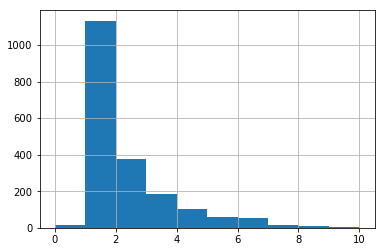

In [66]:
# count how many different roots per word
df.groupby('w_id')['root'].nunique().hist()

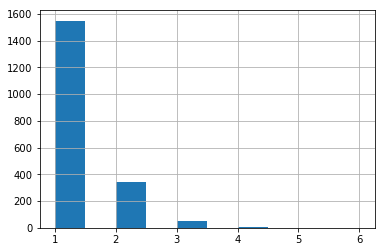

In [70]:
# count how many different stems per word
df.groupby('w_id')['stem'].nunique().hist()

In [68]:
df['gender'].value_counts()

مذكر    13887
مؤنث     3459
          266
Name: gender, dtype: int64

In [69]:
# The type is noun, verb etc but can be quite specific. Does not contain gender, number etc
df['type'].value_counts()

مصدر أصلي                                                       5380
اسم جامد                                                        4771
فعل مضارع مبني للمعلوم                                          3019
فعل ماض مبني للمعلوم                                            1917
فعل مضارع مبني للمجهول                                          1907
اسم فاعل                                                        1886
فعل أمر                                                         1343
اسم مفعول                                                       1000
فعل ماض مبني للمجهول                                             967
اسم تفضيل                                                        746
اسم زمان أو مكان                                                 601
مبالغة اسم الفاعل                                                573
مصدر ميمي                                                        502
مصدر مرة                                                         474
صفة مشبهة                         

We need to make a tab separated file with the following 10 columns:
* Token number (resets every sentence)
* Token
* Lemma (according to MBLEM)
* Morphological segmentation (according to MBMA)
* PoS tag (CGN tagset; according to MBT)
* Confidence in the POS tag, a number between 0 and 1, representing the probability mass assigned to the best guess tag in the tag distribution
* Named entity type, identifying person (PER), organization (ORG), location (LOC), product (PRO), event (EVE), and miscellaneous (MISC), using a BIO (or IOB2) encoding
* Base (non-embedded) phrase chunk in BIO encoding
* Token number of head word in dependency graph (according to CSI-DP)
* Type of dependency relation with head word